# SMOTE

> "Synthetic Minority Over-sampling TEchnique"

- toc: true
- branch: master
- badges: true
- comments: true
- author: 한재수
- categories: [Machine Learning]

`-` ref: N. V. Chawla, K. W. Bowyer, L. O.Hall, W. P. Kegelmeyer, "SMOTE:
       synthetic minority over-sampling technique," Journal of artificial
       intelligence research, 321-357, 2002.

## SMOTE 작동 방식

`-` SMOTE를 사용하기 위해선 변수들이 모두 양적 변수여야 한다 (데이터의 차원은 $n\times p$, 이때 $n$은 샘플의 개수, $p$는 변수의 개수)

`1.` 마이너 클래스의 각 샘플에 대하여 가장 가까운 마이너 클래스 이웃 $k$개의 인덱스를 계산한다 (유클리드 거리를 사용)

`2.` 마이너 클래스에서 $N$개의 샘플을 복원추출하여 인덱스를 저장한다

`3.` 선택된 $N$개의 샘플 각각에 대하여 $k$개의 가장 가까운 이웃중 무작위로 하나를 선택한다

`4.` 모든 $p$개의 변수에 대하여 샘플과 그 샘플의 이웃간의 내분점을 무작위로 선택하여 새로운 샘플을 생성한다

### 예시

| |X1|X2|class|
|:-:|:-:|:-:|:-:|
|i1|3|7|A|
|i2|4|8|A|
|i3|2|5|B|
|i4|1|2|B|
|i5|2|1|B|
|i6|0|3|B|

`-` 마이너 클래스는 `A`, 메이저 클래스는 `B`이다

`-` 합성할 샘플 수 $N$은 $1$로 하겠다, 고려할 이웃의 개수 $k$는 1로 하겠다

`1.` 마이너 클래스 샘플끼리의 거리를 계산한다

$$Dist(i_1,i_2) = \sqrt{(3-4)^2 + (7-8)^2} = \sqrt{2}$$

`2.` 마이너 클래스 샘플 중 무작위로 $N$개를 복원추출한다 $\Longrightarrow i_1$이 선택됐다고 가정

`3.` $i_1$에 가장 가까운 이웃 $k$개를 선택한다 $\Longrightarrow i_2$가 선택됐다고 가정

`4.` 새로운 샘플을 생성: $$i_7 = i_1 + 0.5*(i_2-i_1) = (3.5, 7.5),\; (\text{0.5는 0과 1 사이에 있는 임의의 수})$$

`5.` 합성된 샘플 $i_7$의 class는 `A`이다

`-` 위에선 표준화를 생략했지만 정확한 결과를 얻기 위해서는 표준화를 수행해야 한다

### 장점

`-` 메이저 클래스의 결정 영역에 존재하는 마이너 클래스 샘플을 단순 복제할 경우 마이너 클래스 샘플의 영향력이 커진다

`-` 즉, 마이너 클래스의 결정 영역이 더욱 특별해지고 결정 트리는 새로운 분기를 생성하게 되어 오버피팅이 발생한다

`-` 마이너 클래스의 단순 복제는 결정 영역을 메이저 클래스의 결정 영역으로 확장시키지 못한다 (마이너 클래스의 결정 영역$^c$ = 메이저 클래스의 결정 영역)

`-` 하지만 SMOTE를 사용하면 기존에 존재하지 않던 새로운 마이너 클래스 샘플을 만들므로 마이너 클래스의 결정 영역을 확장시킬 수 있다

`-` 합성된 샘플은 더 크고 덜 중요한 결정 영역을 만듦으로써 분류기가 작고 특정한 결정 영역에 오버피팅 되지 않고 일반화되도록 한다

### 단점

`-` 마이너 클래스 샘플의 가장 가까운 $k$개의 이웃 대부분이 마이너 클래스가 아닐 수 있다

`-` 즉, 마이너 클래스에 분산이 큰 변수가 존재하는 경우 합성된 샘플이 메이저 클래스 샘플과 겹칠 수 있다

### 사용 시 주의사항

`-` 유클리드 거리를 사용하므로 변수의 영향력을 동일시하기 위해 변수마다 표준화를 수행해야 한다

`-` 훈련 데이터에만 적용해야 한다 (합성된 샘플이 검증 데이터를 대표하지 않을 경우 검증 결과를 신뢰할 수 없음)

`-` $k$는 $1$보다 큰 값을 사용해야 한다 ($k=1$일 경우 모집단의 분포를 따르지 않는 이상한 분포로 오버샘플링 된다)

- $k$값에 따른 SMOTE 비교

`-` 각 클래스별 군집은 $1$개로 설정하여 데이터를 생성했다

In [189]:
#hide
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [190]:
#hide
data, label = make_classification(n_features=2, n_informative=2, n_redundant=0, n_samples=100, n_clusters_per_class=1, weights=[0.9], random_state=2)
X, y = data[:, 0], data[:, 1]
label = np.where(label == 0, 'majority', 'minority')

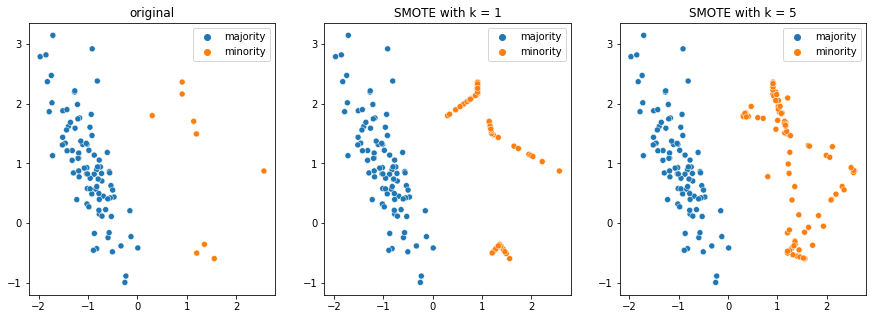

In [191]:
#hide_input
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=X, y=y, hue=label, ax=ax1)
ax1.set_title('original')

data_res, label_res = SMOTE(k_neighbors=1, random_state=2023).fit_resample(data, label)
X_res, y_res = data_res[:, 0], data_res[:, 1]
sns.scatterplot(x=X_res, y=y_res, hue=label_res, ax=ax2)
ax2.set_title('SMOTE with k = 1')

data_res, label_res = SMOTE(k_neighbors=5, random_state=2023).fit_resample(data, label)
X_res, y_res = data_res[:, 0], data_res[:, 1]
sns.scatterplot(x=X_res, y=y_res, hue=label_res, ax=ax3)
ax3.set_title('SMOTE with k = 5')

plt.show()

## SMOTE 코드 설명

`-` 코드: https://github.com/scikit-learn-contrib/imbalanced-learn/blob/master/imblearn/over_sampling/_smote/base.py#L217

- 가장 가까운 이웃 $k$개 계산

`-` `check_neighbors_object` 함수를 사용해 `nn_k_` 라는 `sklearn.neighbors.NearestNeighbors` 인스턴스를 생성하여 가장 가까운 $k$개의 이웃을 계산한다

`-` 참고로 자기 자신과의 거리는 $0$이므로 임의의 샘플에 대하여 가장 가까운 $k$개의 이웃을 찾으면 그 중 하나는 자기 자신이다 

`-` 그래서 `check_neighbors_object` 함수의 `additional_neighbor` 매개변수의 기본값을 $1$로 주어 자기 자신을 제외한 가장 가까운 $k$개의 이웃을 찾는다  

- 거리 계산

`-` `sklearn.neighbors.NearestNeighbors` 오브젝트는 기본값으로 거리 계산 메트릭으로 유클리드 거리를 사용한다

`-` 거리 계산 알고리즘으론 `BallTree`, `KDTree`, `brute-force search` 중에서 적절한 알고리즘을 찾아서 사용한다 

- 샘플링 전략

`-` `sampling_strategy` 매개변수를 사용하여 클래스 라벨(i.g. male)에 합성할 샘플 수(i.g. 150)를 대응시킨 딕셔너리를 만든다 (= `sampling_strategy_`) 

`-` `sampling_strategy_` 딕셔너리를 순회하여 클래스를 합성할 샘플 수 만큼 오버샘플링 한다